In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings



In [ ]:
data=pd.read_csv("W:\\My Documents\\IPL\\Product-Management\\Product-Management-Course\\Semester-3\\Data-Analytics\\Assignment\\FinalCaseStudy\\TRAIN.CSV")

data.shape

In [2]:
data.describe

<bound method NDFrame.describe of              ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
189994  train_189994       0  14.3668 -2.0129  10.1292  7.4253   8.9276   
189995  train_189995       0   6.9524  2.9422   9.7855  2.7210  13.2730   
189996  train_189996       0  14.1422 -0.1108   9.1170  3.8233  11.7461   
189997  train_189997       0  11.6495  2.4247  11.1979  7.3312   8.6675   
189998  train_189998       0   7.4998 -1.2674   9.6701  5.1500  11.7555   

          var_5   var_6    var_7  ...  var_190  var_191  var_192 

In [3]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,...,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000
mean,0.100443,10.678987,-1.629164,10.713360,6.795833,11.079682,-5.066098,5.408473,16.546521,0.283457,...,3.233439,7.441028,1.927730,3.332482,17.994544,-0.142832,2.302125,8.908355,15.868713,-3.329490
std,0.300590,3.041694,4.052565,2.639877,2.043388,1.622652,7.857142,0.866581,3.416479,3.334076,...,4.560611,3.022818,1.477608,3.990300,3.135354,1.428951,5.455130,0.921699,3.010732,10.439301
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.277800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.452500,-4.742900,8.721050,5.251750,9.884900,-11.197850,4.767950,13.947050,-2.319650,...,-0.061700,5.160550,0.890250,0.584550,15.631300,-1.170100,-1.952850,8.253000,13.827250,-11.219350
50%,0.000000,10.524900,-1.612300,10.579000,6.823700,11.110200,-4.828200,5.384800,16.456800,0.390600,...,3.201000,7.350700,1.900400,3.395300,17.958200,-0.173600,2.408200,8.888200,15.931600,-2.827100
75%,0.000000,12.756450,1.359300,12.514100,8.324400,12.262600,0.920900,6.002800,19.102950,2.938450,...,6.407250,9.514050,2.947650,6.206200,20.396200,0.828300,6.556650,9.593500,18.062650,4.835400
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.638900,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [4]:
data.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [5]:
print(data.dtypes)

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object


In [6]:
data.head(13)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [7]:
corr=data.corr()

In [11]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [13]:
corr.to_excel("corr-19July.xlsx")

In [24]:
# this is find out colums with null values. There are no null values in any of the columns and rows
data.isnull().sum().sort_values(ascending = True)

ID_code    0
var_126    0
var_127    0
var_128    0
var_129    0
var_130    0
var_131    0
var_132    0
var_133    0
var_134    0
var_135    0
var_136    0
var_137    0
var_138    0
var_139    0
var_140    0
var_141    0
var_142    0
var_143    0
var_144    0
var_145    0
var_146    0
var_125    0
var_147    0
var_124    0
var_122    0
var_101    0
var_102    0
var_103    0
var_104    0
var_105    0
var_106    0
var_107    0
var_108    0
var_109    0
var_110    0
var_111    0
var_112    0
var_113    0
var_114    0
var_115    0
var_116    0
var_117    0
var_118    0
var_119    0
var_120    0
var_121    0
var_123    0
var_148    0
var_149    0
var_150    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_176    0
var_175    0
var_174    0
var_173    0
var_151    0

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189999 entries, 0 to 189998
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 292.8+ MB
None


In [20]:
data.info

<bound method DataFrame.info of              ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
189994  train_189994       0  14.3668 -2.0129  10.1292  7.4253   8.9276   
189995  train_189995       0   6.9524  2.9422   9.7855  2.7210  13.2730   
189996  train_189996       0  14.1422 -0.1108   9.1170  3.8233  11.7461   
189997  train_189997       0  11.6495  2.4247  11.1979  7.3312   8.6675   
189998  train_189998       0   7.4998 -1.2674   9.6701  5.1500  11.7555   

          var_5   var_6    var_7   var_8   var_9  var_10   var_11  

In [18]:
data["target"].value_counts()

0    170915
1     19084
Name: target, dtype: int64

In [28]:
# there are no null values. So no rows or columns are dropped
data.dropna(inplace=True)
data.shape

(189999, 202)

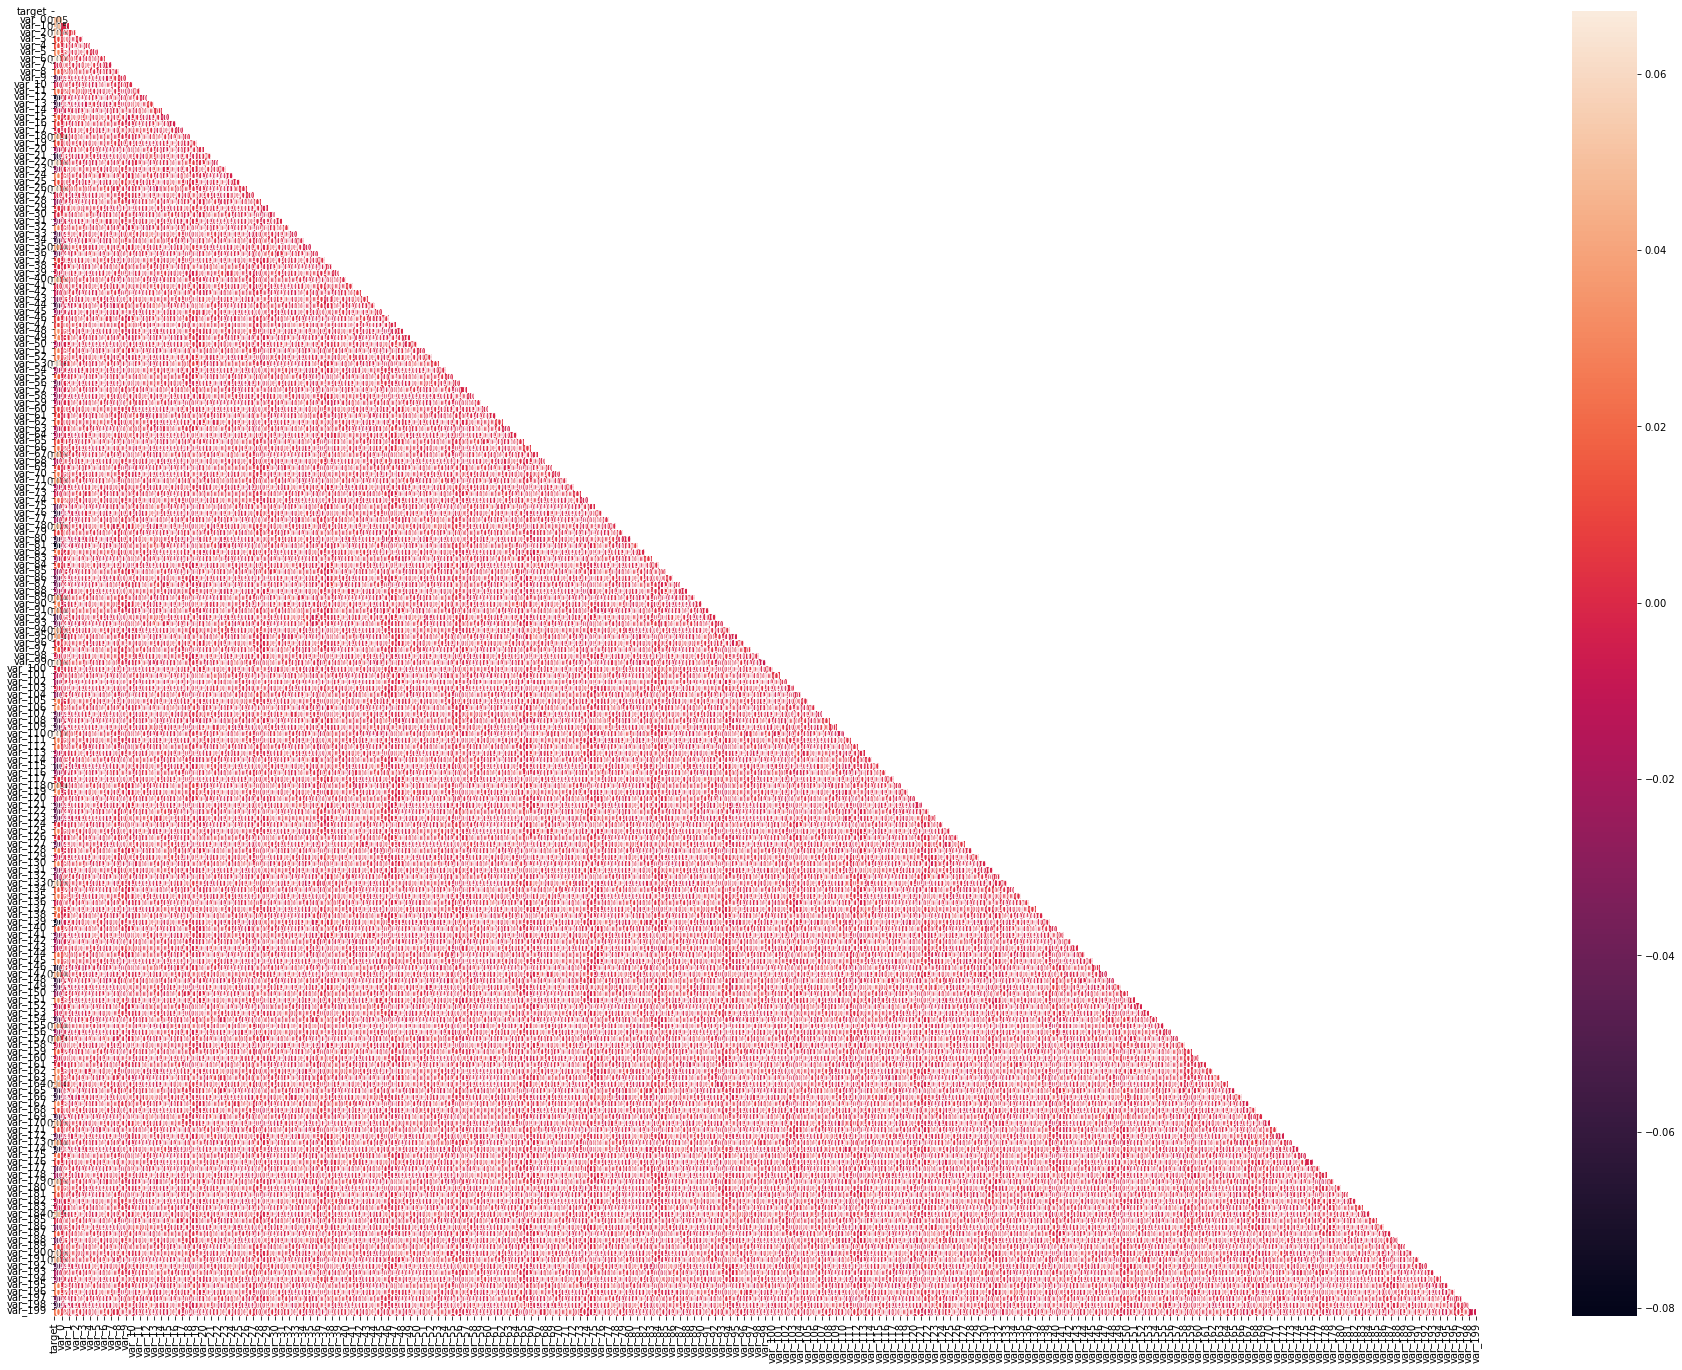

In [31]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(32, 24))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [34]:
order_top2 = np.argsort(-corr.values, axis=1)[:, :5]
order_bottom = np.argsort(corr.values, axis=1)[:, :5]

result_top2 = pd.DataFrame(
    corr.columns[order_top2], 
    columns=['1st', '2nd','3rd','4th','5th'],
    index=corr.index
)

result_bottom = pd.DataFrame(
    corr.columns[order_bottom], 
    columns=['Last1','Last2','Last3','Last4','Last5'],
    index=corr.index
)

result = result_top2.join(result_bottom)

C:\Users\srininat\AppData\Local\Temp/ipykernel_30000/551342953.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_top2],
C:\Users\srininat\AppData\Local\Temp/ipykernel_30000/551342953.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  corr.columns[order_bottom],


In [35]:
result

,1st,2nd,3rd,4th,5th,Last1,Last2,Last3,Last4,Last5
target,target,var_6,var_110,var_53,var_26,var_81,var_139,var_12,var_146,var_174
var_0,var_0,target,var_40,var_6,var_144,var_123,var_166,var_76,var_81,var_139
var_1,var_1,target,var_189,var_11,var_29,var_80,var_115,var_93,var_166,var_44
var_2,var_2,target,var_112,var_26,var_130,var_13,var_80,var_166,var_76,var_21
var_3,var_3,target,var_30,var_120,var_91,var_146,var_13,var_110,var_170,var_78
var_4,var_4,target,var_24,var_114,var_7,var_171,var_156,var_184,var_154,var_42
var_5,var_5,target,var_61,var_46,var_31,var_9,var_75,var_179,var_34,var_172
var_6,var_6,target,var_157,var_0,var_71,var_80,var_148,var_174,var_9,var_86
var_7,var_7,var_34,var_197,var_19,var_4,var_44,var_133,var_138,var_157,var_142
var_8,var_8,target,var_135,var_0,var_151,var_172,var_186,var_197,var_12,var_92
